In [60]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
pip install pandas 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
#from lazypredict.Supervised import LazyRegressor, LazyClassifier
# Machine Learning : Training
from xgboost import plot_importance
# Regression
#import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
# Classification
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# Cluster
from sklearn.cluster import KMeans

# Machine Learning : Evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Regression



In [5]:
# Reading the data
df=pd.read_csv("C:/Users/PRIYAN/Downloads/car data.csv") 
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
pd.DataFrame(df.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
Car_Name,98
Year,16
Selling_Price,156
Present_Price,148
Driven_kms,206
Fuel_Type,3
Selling_type,2
Transmission,2
Owner,3


In [10]:
df.duplicated().sum()

2

In [11]:
df.drop_duplicates()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [12]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [13]:
continuous_columns = ['Year','Selling_Price','Present_Price','Driven_kms']
category_columns = ['Car_Name','Fuel_Type','Selling_type','Transmission','Owner']

In [14]:
#Select categorical columns from DataFrame efficiently.
category_str = ['Car_Name','Fuel_Type','Selling_type','Transmission','Owner']
string_columns = df.select_dtypes(exclude=['int64',"float64"]).columns
numeric_columns = df.select_dtypes(include=['int64',"float64"]).columns

In [18]:
### correlation
numeric_df=df[numeric_columns]

In [20]:
numeric_df.corr()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


In [21]:
correlation_matrix =numeric_df.corr()
fig = px.imshow(correlation_matrix, color_continuous_scale='Cividis',
                title="Correlation Matrix")
fig.show()

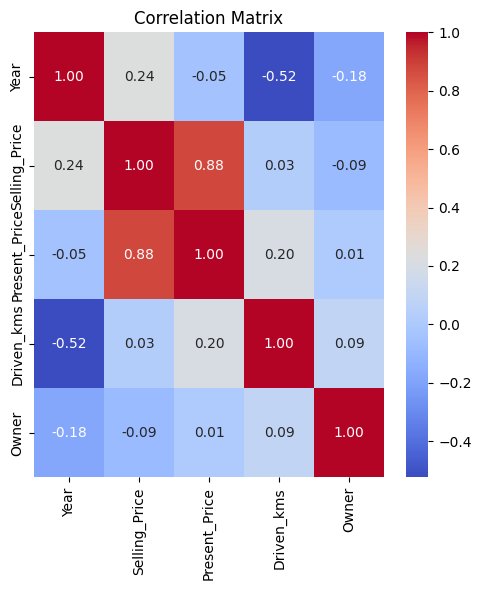

In [25]:
plt.figure(figsize=(5, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

###Data Visulaization

In [26]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

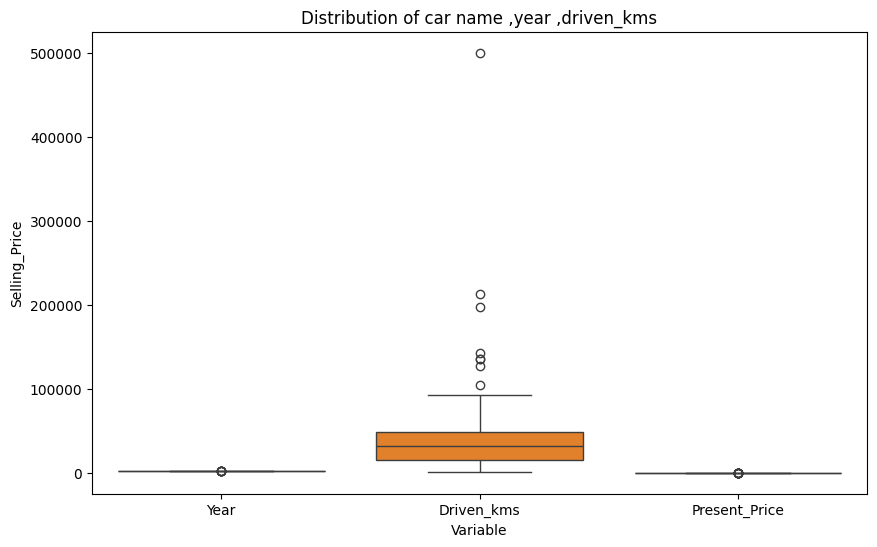

In [33]:
##distribution of continious data 
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Year','Driven_kms','Present_Price']])
plt.title('Distribution of car name ,year ,driven_kms')
plt.ylabel('Selling_Price')
plt.xlabel('Variable')
plt.show()

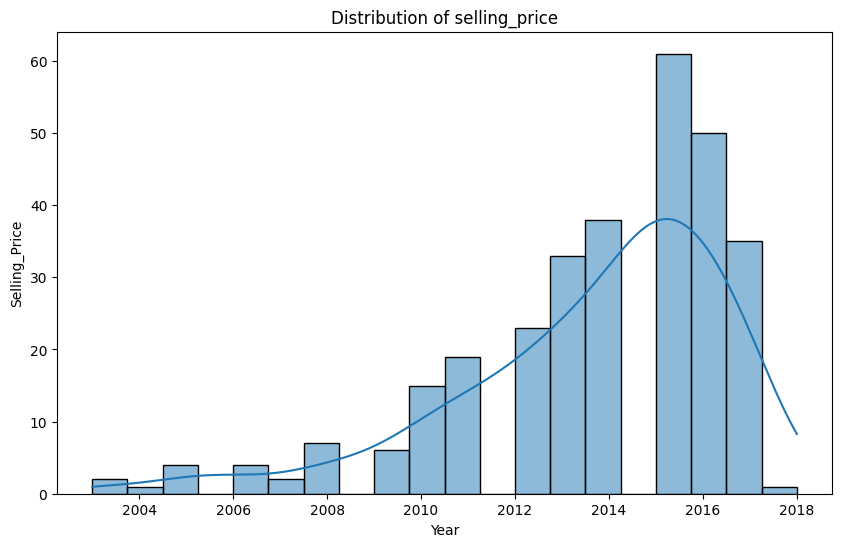

In [32]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Year', bins=20, kde=True)
plt.title('Distribution of selling_price')
plt.xlabel('Year')
plt.ylabel('Selling_Price')
plt.show()

### continious vs continious  

In [34]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

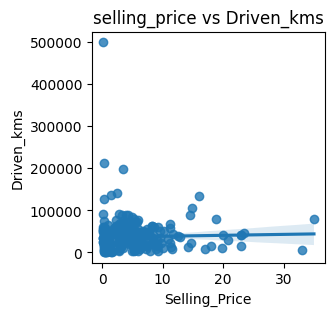

In [35]:
# Scatter plot with trend line
plt.figure(figsize=(3, 3))
sns.regplot(data=df, x='Selling_Price', y='Driven_kms')
plt.title('selling_price vs Driven_kms')
plt.xlabel('Selling_Price')
plt.ylabel('Driven_kms')
plt.show()

#### continious vs categorical

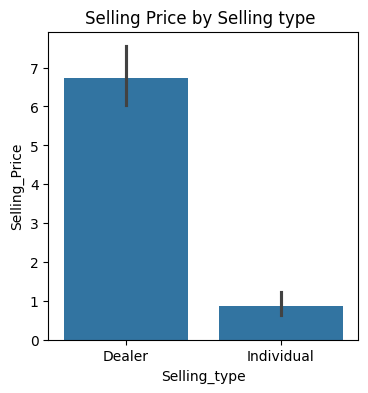

In [40]:
# Bar plot
plt.figure(figsize=(4, 4))
sns.barplot(data=df, x='Selling_type', y='Selling_Price')
plt.title('Selling Price by Selling type ')
plt.xlabel('Selling_type')
plt.ylabel('Selling_Price')
plt.show()

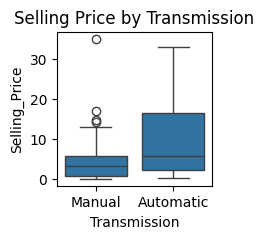

In [41]:
# Box plot
plt.figure(figsize=(2, 2))
sns.boxplot(data=df, x='Transmission', y='Selling_Price')
plt.title('Selling Price by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Selling_Price')
plt.show()

In [42]:
####categorical vs categorical

# Contingency table
contingency_table = pd.crosstab(df['Fuel_Type'], df['Transmission'])
print(contingency_table)


Transmission  Automatic  Manual
Fuel_Type                      
CNG                   0       2
Diesel               12      48
Petrol               28     211


In [43]:
import seaborn as sns
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

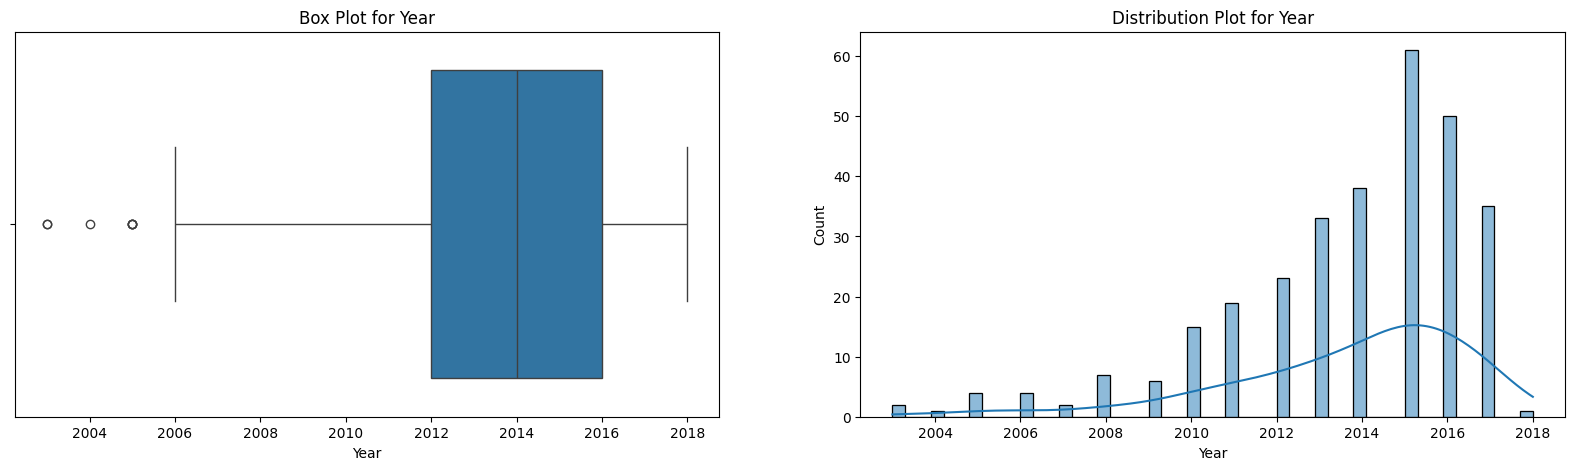

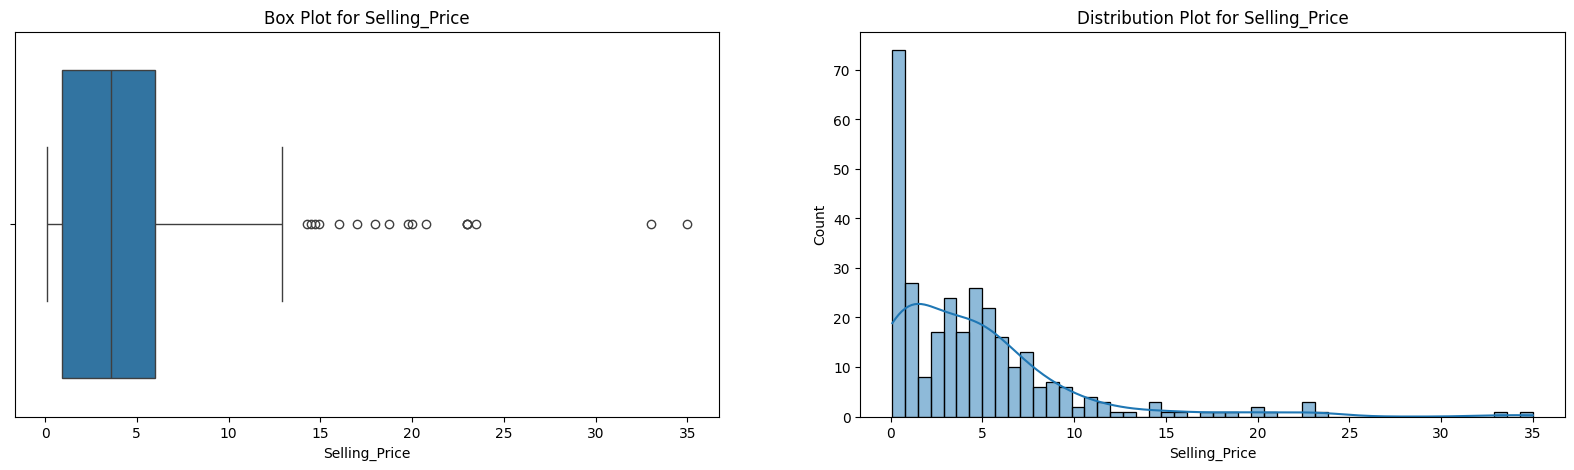

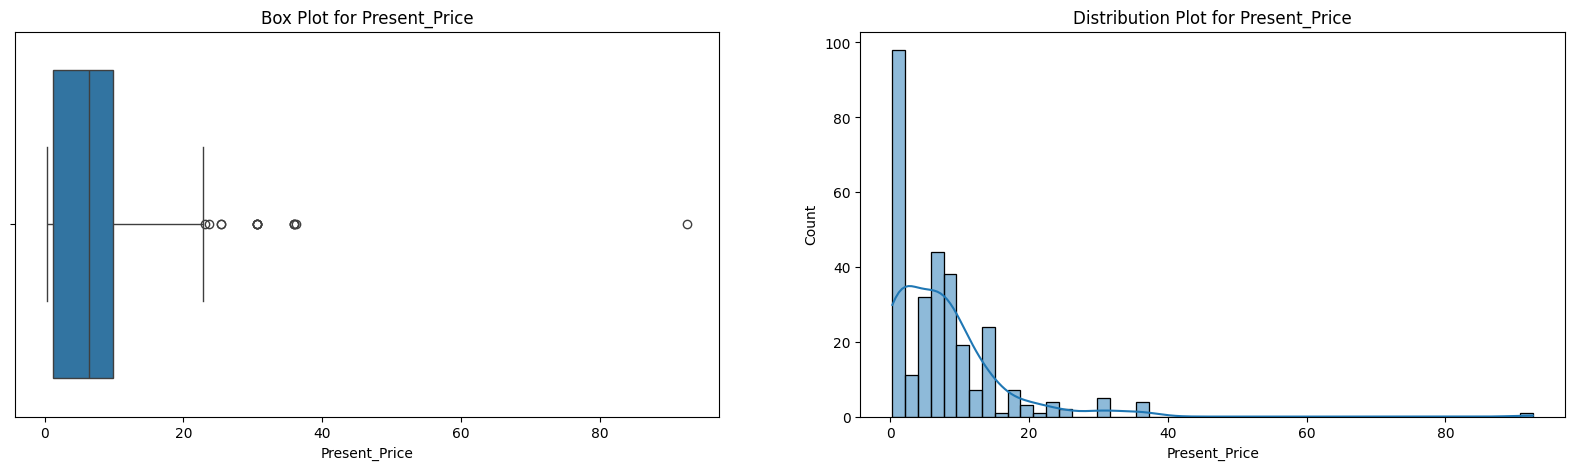

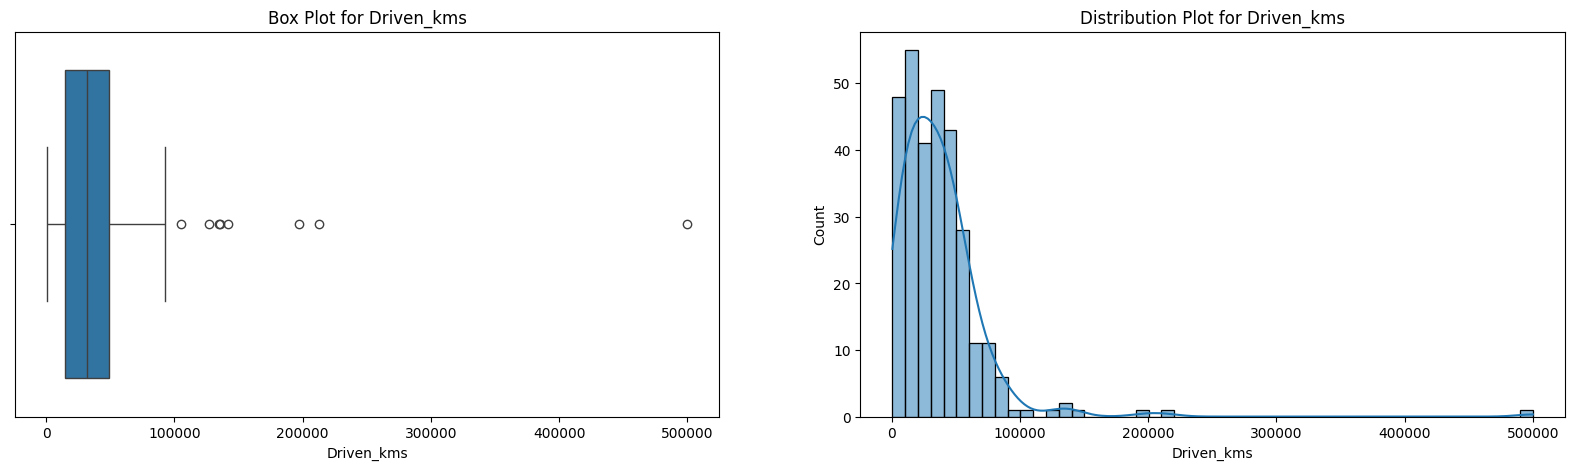

In [45]:
for i in ['Year','Selling_Price','Present_Price','Driven_kms']:
    plot(df, i)

In [46]:
def plot_pairplot(df):
    sns.pairplot(df)
    plt.title('Pairplot of Select columns')
    plt.show()

#### Hnadling outliers

In [47]:
# IQR (Interquartile range)
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

### label encoder

In [ ]:
category_columns = ['Car_Name','Fuel_Type','Selling_type','Transmission','Owner']

In [52]:
# Using encoder
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
encode = LabelEncoder()

# Encode each column and assign it back properly
df['Car_Name'] = encode.fit_transform(df['Car_Name'])
df['Fuel_Type'] = encode.fit_transform(df['Fuel_Type'])
df['Selling_type'] = encode.fit_transform(df['Selling_type'])
df['Transmission'] = encode.fit_transform(df['Transmission'])
df['Owner'] = encode.fit_transform(df['Owner'])


In [53]:

# Standardization using MinMaxScaler
scaler = MinMaxScaler()
scaler_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

scaler_df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,0.927835,0.733333,0.093123,0.057109,0.053053,1.0,0.0,1.0,0.0
1,0.958763,0.666667,0.133238,0.099913,0.085085,0.5,0.0,1.0,0.0
2,0.701031,0.933333,0.204871,0.103273,0.012813,1.0,0.0,1.0,0.0
3,0.989691,0.533333,0.078797,0.041504,0.009409,1.0,0.0,1.0,0.0
4,0.948454,0.733333,0.128940,0.070980,0.083984,0.5,0.0,1.0,0.0


### Machine Learning

In [54]:
# 2 separating independent and dependent
x=df.drop("Selling_Price",axis=1)
y=df["Selling_Price"]

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)

In [56]:
# Randomly sample 10% of the data
sampled_data = df.sample(frac=0.1, random_state=42)

# Extract features (X) and target variable (Y)
X=sampled_data.drop("Selling_Price",axis=1)
Y=sampled_data["Selling_Price"]

# Split the sampled data into training and testing sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25, random_state=42)

In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score

class Regressor_models:
  def __init__(self,x_train,x_test,y_train,y_test):
    self.x_train = x_train
    self.x_test = x_test
    self.y_train = y_train
    self.y_test = y_test

  def decisiontree(self):
    from sklearn.tree import DecisionTreeRegressor
    model = DecisionTreeRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("decisiontree Regressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def RandomForestRegressor(self):
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("RandomForestRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def GradientBoosting(self):
    from sklearn.ensemble import GradientBoostingRegressor
    model = GradientBoostingRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("GradientBoostingRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def AdaBoost(self):
    from sklearn.ensemble import AdaBoostRegressor
    model = AdaBoostRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("AdaBoostRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def ExtraTreesRegressor(self):
    from sklearn.ensemble import ExtraTreesRegressor
    model = ExtraTreesRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("Extra Trees Regressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

In [75]:
model = Regressor_models(x_train,x_test,y_train,y_test)
accuracy_scores = {
    'DecisionTree': model.decisiontree(),
    'RandomForest': model.RandomForestRegressor(),
    'GradientBoosting' : model.GradientBoosting(),
    'AdaBoost' : model.AdaBoost(),
    'ExtraTreesRegressor': model.ExtraTreesRegressor()}

decisiontree Regressor accuracy score:  1.0 0.9643115325611332
RandomForestRegressor accuracy score:  0.9798548709670852 0.9694890477648135
GradientBoostingRegressor accuracy score:  0.9970945207981551 0.9634177366999761
AdaBoostRegressor accuracy score:  0.960535302946093 0.9388470448436221
Extra Trees Regressor accuracy score:  1.0 0.9788544023425223


In [76]:
#The best algo for specific dataset is randomforest

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9808967724055138, 0.9691983843417282)

### so the Random forest gives the better R2 score and accuracy ,, so the opt model is Random forest